# Predictive Analysis Performance Assessment

### John Foster
### Department of Information Technology, Western Governors University
### D209: Data Mining I
### Professor Festus Elleh
### May 12, 2023

### A1: PROPOSAL OF QUESTION

The research question I have decided to pursue using the Churn dataset is as follows: 

“Which of two selected decision tree-based regression models will yield the lowest mean squared error when used to predict the tenure of a given customer?”

-A raw decision tree with max_depth, min_samples_split, and min_samples_leaf hyperparameters found via grid search 
<br>-A histogram-based gradient boosting decision tree using entirely default hyperparameters

This research question is meant to optimize a regression model to predict values for the Tenure variable. In our logistic regression performed on the Churn variable in D208, we identified Tenure as a mitigating factor in the likelihood of a customer churning in a given month. WIth that in mind, it is valuable to be able to explore the relationships between Tenure and other variables in the dataset as a first step toward maximizing customer Tenure. To do that, we must first demonstrate that any relationships exist at all. This is what we will use our decision tree models to demonstrate.


### A2: DEFINED GOAL

As mentioned above, our goal for this analysis is determining whether some statistical relationship exists between Tenure and the other features of the Churn dataset. However, not all of these relationships will necessarily be linear, so a multiple linear regression model may not be robust enough to tell us definitively if Tenure is worth analyzing in more depth. Instead, we can use a non-parametric regression model, such as a decision tree, to conclusively show us if the other features in our dataset have a relationship with Tenure. If the model demonstrates a low degree of error, we can conclude that there is a high likelihood that other features in the dataset have relationships with Tenure, and we can recommend further analytical techniques to illuminate them. 

As a secondary objective, my own subjective goal for the performance of the best model in this analysis is a mean squared error below 1.

### B1: EXPLANATION OF PREDICTION METHOD

A decision tree regressor operates by programmatically generating binary sorting decisions based on the values and relationships of features included in the analysis. It can be conceptualized as a tree (or more accurately, an inverted tree) because it is comprised of a branching series of nodes. Every node in a layer above the maximum depth of the tree splits into 2 more nodes below it based on a comparison between the input values and the chosen feature thresholds of that node, which are derived iteratively based on which will features and thresholds will split the inputs into subsets that can be used to most accurately predict the output variable (Bruce et al., 2020, p. 249-50). It does this by computing the mean of the target variable value of every observation sorted into that side of the node. It then compares this average to the observed target variable values of those observations and selects the best features and thresholds for that node by selecting the one with the best score in a chosen accuracy criterion (Larose & Larose, 2019, p. 82). The accuracy criterion tends to center on an evaluation of the residuals among the model’s tested predictions. In our analysis, our primary criterion will be mean squared error (MSE). MSE is the average of a model’s squared residuals, residuals being defined as the differences between predicted values and observed values.

At the final level of the decision tree, the nodes terminate in what are called “leaf” nodes. In the same way that the model generates its thresholds for internal nodes, the leaf nodes contain the average value of the target variable among observations that terminate in that node. These values represent the final prediction that the model will make on input observations.

In addition to a base decision tree model, we will also be experimenting with histogram-based gradient boosted decision trees (HBGBDT) in order to compare performance between our models.

An HBGBDT is based on a decision tree model, but there are multiple important differences. First, instead of evaluating node thresholds across every feature value, this type of model instead places the data of each feature into histogram bins based on its distribution, giving it far fewer total calculations to run (Kovan, 2021). Second, the model optimizes itself by iteratively boosting a base predictor model (typically a model that estimates the mean of the target variable). It accomplishes this by evaluating the split points with the best potential to minimize the loss function (Bruce et al., 2020, p. 272). In our case, the loss function will be squared error so that we can continue to pursue the smallest possible MSE in our final model. 
With each boosting iteration, the algorithm multiplies its thresholds and predictions by a coefficient called a learning rate, which is typically a decimal. It then adds the scaled values to the ensemble (the aggregation of models constructed over the course of these iterations). This process repeats itself, and the model continually validates its current iteration of the ensemble model until a declared stopping criterion is met. In our case, this criterion is the stalling of continued decreases in the ensemble’s MSE.

https://towardsdatascience.com/an-overview-of-boosting-methods-catboost-xgboost-adaboost-lightboost-histogram-based-gradient-407447633ac1


### B2: SUMMARY OF METHOD ASSUMPTION

One assumption of a decision tree regressor is that the training and validation subsets of the dataset are sourced from the same distribution of data. This may also be referred to as data homogeneity. If we were to split our data according to some derived criteria related to the data itself, such as splitting the observations along a defined cutoff value for our Tenure variable, this would make our training and testing sets non-homogeneous and violate this assumption.

### B3: PACKAGES OR LIBRARIES LIST

We have chosen to use several Python libraries in our assessment, and each serve very important functions. We will now list the libraries as well as any specific modules and briefly describe how they are used in our analysis.

-Pandas: Our primary dataframe generation and manipulation toolset. We use Pandas to generate dataframe objects from our source .csv file, instantiate other dataframe objects to process and rearrange data, and export our prepared datasets to .csv files.

-Numpy: A robust toolset of optimized mathematical functions. We use Numpy in this analysis to return a series of evenly-spaced numbers from a start and stop point to programmatically generate the arguments of our grid search using the .arange function. This code is commented out, and the optimal values declared explicitly to simplify demonstration of the code during the Panopto presentation.

-Sklearn: A well-supported and thoroughly documented toolset for various predictive models and analytics tasks related thereto. We utilize multiple modules from this larger library, which we will list below.
<br>	.preprocessing: Used for encoding our categorical data.
<br>	.tree: Used to access our base DecisionTreeRegressor() class object.
<br>	.ensemble: used to access our HistGradientBoostingRegressor() class object.
<br>	.model_selection: Used for splitting our dataset into training and testing subsets for accuracy validation and for grid search functionality.
<br>	.metrics: Primarily used for visualizing and conveying the performance results of the model. Includes our functions to return MSE and mean absolute error (MAE).

-Matplotlib: Industry standard python data visualization library.
<br>	.pyplot: Used for conveying our sorted residuals for model comparison.

### C1: DATA PREPROCESSING

Although decision tree-based models are considered to be fairly robust in their capacity to handle messy data (including outliers and even missing values), we can describe at least one data preprocessing goal necessary for our analysis. As we described in part B2, one of the primary assumptions of a decision tree regressor is homogeneity of training and validation data. In our analysis, we will accomplish this by randomly selecting which observations in the dataset will be placed into the training or testing divisions to ensure that the samples are homogeneous. We will be explicitly defining that 80% of the total dataset will serve as the training data, and 20% will serve as the testing data.

### C2: DATASET VARIABLES

#### I wanted to prioritize programmatic feature selection in this analysis, so we will be initially including every feature in the dataset that can be feasibly used. However, there are multiple features that were not appropriate to include for various reasons. The features that were initially included in the analysis are as follows:

Lat: Continuous.

Lng: Continuous.

Population: Continuous.

Area: Categorical.

Children: Continuous.

Age: Continuous.

Income: Continuous.

Marital: Categorical.

Gender: Categorical.

Outage_sec_perweek: Continuous.

Email: Continuous.

Contacts: Continuous.

Yearly_equip_failure: Continuous.

Techie: Categorical.

Contract: Categorical.

Port_modem: Categorical.

Tablet: Categorical.

InternetService: Categorical.

Phone: Categorical.

Multiple: Categorical.

OnlineSecurity: Categorical.

OnlineBackup: Categorical.

DeviceProtection: Categorical.

TechSupport: Categorical.

StreamingTV: Categorical.

StreamingMovies: Categorical.

PaperlessBilling: Categorical.

PaymentMethod: Categorical.

MonthlyCharge: Continuous.

Bandwidth_GB_Year: Continuous.

Churn: Categorical.

Item1: Categorical. Expressed natively as an integer, but is a survey response.

Item2: Categorical. Expressed natively as an integer, but is a survey response.

Item3: Categorical. Expressed natively as an integer, but is a survey response.

Item4: Categorical. Expressed natively as an integer, but is a survey response.

Item5: Categorical. Expressed natively as an integer, but is a survey response.

Item6: Categorical. Expressed natively as an integer, but is a survey response.

Item7: Categorical. Expressed natively as an integer, but is a survey response.

Item8: Categorical. Expressed natively as an integer, but is a survey response.

Tenure: Continuous.

#### The following features were excluded from our analysis:

CaseOrder: Continuous variable used as an index to preserve the order of  the original dataset. Irrelevant to our analysis.

Customer_id: Unique categorical variable representing each customer in the dataset. Inappropriate to encode because its values are unique.

Interaction: Unique categorical variable representing interactions between the customer and organization. Inappropriate to encode because its values are unique.

UID: Unique categorical variable representing interactions between the customer and organization. Inappropriate to encode because its values are unique.

City: Categorical variable representing the city in which the customer lives. Inappropriate to encode due to the number of unique values.

State: Categorical variable representing the state in which the customer lives. Inappropriate to encode due to the number of unique values.

County: Categorical variable representing the county in which the customer lives. Inappropriate to encode due to the number of unique values.

Zip: Categorical variable representing the postal code in which the customer lives. Inappropriate to encode due to the number of unique values. Expressed as an integer, but should be considered categorical.

Job: Categorical variable representing the customer’s vocation. Inappropriate to encode due to the number of unique values. 

TimeZone: Categorical variable representing the customer’s timezone. Inappropriate to use because lines of timezone are not standardized or equidistant in the same way as longitude, but an inaccurate and inferior measure of the same thing.


### C3: STEPS FOR ANALYSIS

Because we have chosen to use decision tree models, we do not actually need to evaluate our dataset for nullity or outliers. We will choose to skip outlier treatment, but we will still elect to detect and treat for duplicates (by dropping them) and nullity (by median imputing any missing values). Given that this is the same dataset used in D208, we should not expect to find any duplicates or null values in the dataset.

Our first objective in preparing our data for analysis is re-expressing our categorical features numerically. Categorical variables must be encoded into numeric values so that they can be evaluated with the rest of the data mathematically using sklearn's DT implementations.

Once we have re-expressed our categorical features, we will be ready to split the dataset into training and testing partitions, and export the prepared datasets. This also serves as a natural breakpoint in the analysis, because it allows us to compare different model implementations on the same prepared and imported dataset in other scripts, if we so chose.

To preserve the continuity of the notebook file, we will briefly summarize our steps for data preprocessing in markdown cells throughout the code that executes those steps.

#### First, we will import all of our necessary libraries.

In [228]:
#Import the libraries that we need for our analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### We import our base dataframe from the provided .csv file and make a copy.

In [229]:
#Import the churn dataset from the source csv file and make a dataframe out of it.
raw_df = pd.read_csv('churn_clean.csv')

#Make a copy of the imported dataframe in case we would like to inspect or manipulate the raw data. 
df = raw_df.copy()
#Create a list of all column names in the dataframe
df_cols = df.columns.to_list()

#### Now we can detect and treat duplicates.

In [230]:
#Drop any duplicate rows from the dataframe
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
#Check for duplicates using assertion statements on columns purported to contain unique values.
#This is a more in-depth approach to ensure that no duplicates remain.
assert df['Customer_id'].duplicated().all() == False
assert df['Interaction'].duplicated().all() == False

False    10000
dtype: int64


#### Next, we will detect and treat any null values.

In [231]:
#Make a list out of the names of the columns that have missing data.
missing_cols = df.columns[df.isnull().any()].to_list()
print(missing_cols)
#Drop any rows containing nullity
df.dropna(how='all')
assert len(missing_cols) == 0

[]


#### We can now define which variables will be used in our analysis.

In [232]:
#Define our independent variables and dependent variable for initial regression.
X_cols = df.columns.tolist()
print(X_cols)

Y_col = X_cols.pop(X_cols.index('Tenure'))

#These columns are inappropriate because they contain too many unique values to process or encode
bad_cols = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Job']
#TimeZone is analogous and inferior to longitude ('Lng'), and has inconsistent formatting
bad_cols.append('TimeZone')

#Remove our bad columns
for col in bad_cols:
    X_cols.pop(X_cols.index(col))

print(X_cols)
print(Y_col)

['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
['Lat', 'Lng', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',

#### We can construct our base dataframe. Our encoded columns will be rolled into this after encoding is complete.

In [233]:
#Make a new dataframe out of X_cols and add Y_col to it.
#This will conclude our data cleaning.
XY_cols = []
XY_cols.extend(X_cols)
XY_cols.append(Y_col)
print(X_cols)
print(Y_col)
print(XY_cols)
XY_df = pd.DataFrame()
for col in XY_cols:
    XY_df[col] = df[col]
print(XY_df.info())

['Lat', 'Lng', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
Tenure
['Lat', 'Lng', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Ite

#### To encode, we must first decide which categorical features will be encoded ordinally, and which will be encoded nominally via one-hot encoding.

In [234]:
#Generate our lists of categorical features to be encoded using each method.
nom_enc_cols= ['PaymentMethod','Gender','Marital','InternetService']
ord_enc_cols= []

for col in XY_cols:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        if col not in nom_enc_cols:
            ord_enc_cols.append(col)

print(nom_enc_cols)
print(ord_enc_cols)

['PaymentMethod', 'Gender', 'Marital', 'InternetService']
['Area', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


#### Now we can use one-hot encoding to re-express our nominal categorical features. We will also perform some string manipulation on the column names and drop one encoded column per base variable to abide by the K-1 rule.

In [235]:
#We are nearly ready to start encoding.
#Make a blank disctionary to be used in the encoding and imputation process.
nom_enc_dict = {}
#Create a blank dataframe specifically for the nominal encoding process
nom_df = pd.DataFrame()

for col_name in nom_enc_cols:
    nom_enc_dict[col_name] = preprocessing.OneHotEncoder()
    col = XY_df[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    nom_vals = nom_enc_dict[col_name].fit_transform(reshaped_vals)
    nom_df_loop = pd.DataFrame(nom_vals.toarray(), columns=nom_enc_dict[col_name].get_feature_names_out())
    nom_df_loop.index = col_not_null.index
    nom_df = nom_df.join(nom_df_loop, how='outer')

#Search all column names in nom_df and if they start with 'x0_', remove 'x0_' from the string. 
for col in nom_df.columns:
    if col.startswith('x0_'):
        new_col_name = col.replace('x0_', '')
        nom_df.rename(columns={col: new_col_name}, inplace=True)

#Now we should drop one of our dummy columns for each of our original columns to abide by the K-1 rule.
nom_df.drop(columns = ['Mailed Check', 'Nonbinary', 'Never Married', 'None'], inplace=True)

#Print our final list of nominally encoded columns
print(nom_df.columns.tolist())

['Bank Transfer(automatic)', 'Credit Card (automatic)', 'Electronic Check', 'Female', 'Male', 'Divorced', 'Married', 'Separated', 'Widowed', 'DSL', 'Fiber Optic']


#### Next we perform a similar process for our ordinal columns. Due to the default behavior of the class object, the encoder orders the classes alphabetically, which conveniently is the correct logical order for all of our affected features. 

In [236]:
#As before, we will make a blank dictionary and dataframe.
ord_enc_dict = {}
ord_df = pd.DataFrame()

#Ordinally encode the features
for col_name in ord_enc_cols:
    ord_enc_dict[col_name] = preprocessing.OrdinalEncoder()
    col = XY_df[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    ord_vals = ord_enc_dict[col_name].fit_transform(reshaped_vals)
    ord_df_loop = pd.DataFrame(ord_vals, columns=ord_enc_dict[col_name].get_feature_names_out())
    ord_df_loop.index = col_not_null.index
    ord_df[col_name] = ord_df_loop

print(ord_df.columns.tolist())

['Area', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


#### Now we can roll our encoded data into a new dataframe so it can be split and exported. We will also drop our nominal source columns at this time.

In [237]:
#make an encoding dataframe for manipulation
enc_df = XY_df.copy(deep=True)
for col in ord_df.columns:
    enc_df[col] = ord_df[col]
for col in nom_df.columns:
    enc_df[col] = nom_df[col] 

enc_df.drop(columns=['PaymentMethod','Gender','Marital','InternetService'], inplace=True)


#### Create one more dataframe as a breakpoint in case we would like to implement additional preprocessing steps on subsequent analyses. We will also divide it into our Xand Y columns.

In [238]:
reg_df = enc_df.copy(deep=True)
# Set dependent variable. This doesn't really change over the course of our analysis.
Y_initial = reg_df[[Y_col]]
# Set multiple independent variables. These will change as we progress and drop features.
X_initial = reg_df.drop(columns=Y_col)

#### The data is now fully prepared and ready to be split and exported.

### C4: CLEANED DATASET

At this point, we can export our fully prepared dataset by utilizing the DataFrame.to_csv() function in the pandas library. This file will be included in the final submission and available for evaluation via the WGU submission portal.

In [239]:
#Prepare our data for export
XY_initial_df = pd.DataFrame()
for col in X_initial.columns:
    XY_initial_df[col] = X_initial[col]
for col in Y_initial.columns:
    XY_initial_df[col] = Y_initial[col]
print(XY_initial_df.columns.tolist())

XY_initial_df.to_csv('DT_cleaned.csv', index=False)

['Lat', 'Lng', 'Population', 'Area', 'Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Bank Transfer(automatic)', 'Credit Card (automatic)', 'Electronic Check', 'Female', 'Male', 'Divorced', 'Married', 'Separated', 'Widowed', 'DSL', 'Fiber Optic', 'Tenure']


### D1: SPLITTING THE DATA

We will also split our prepared data into its final training and testing subsets for export. Our analysis allocated 30% of our data to the testing set in order to mirror the split we chose with our past logistic regression. This will hopefully ensure that we are not biasing our results by skewing the split criterion in some way.

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X_initial, Y_initial, test_size=0.2, random_state=0)

df_dict = {
    'X_train':X_train,
    'X_test':X_test,
    'y_train':y_train,
    'y_test':y_test
}

for i in df_dict.keys():
    df_dict[i].to_csv('DT_'+ i + '.csv', index=False)

### D2: OUTPUT AND INTERMEDIATE CALCULATIONS

Now that our data is fully prepared, we can begin our analysis. Our first step is to find the optimal hyperparameters for our initial decision tree model. To do this, we will perform a grid search to  iterate through every combination of hyperparameters in the ranges that we declare for each, returning the model with the lowest MSE. As a point of note, our hyperparameters dictionary will be using explicitly declared hyperparameters for the benefit of recording quality in our video presentation. These declared hyperparameters were found by using the ranges that are commented out above them.

After we have our best performing DT model, we then use the .predict() method to generate our predictions on the test dataset so that we can return our final MSE and MAE for the model. Next, we convert our observed and predicted test target values to lists, and make a new list of absolute differences by subtracting the predicted values from the observed values and wrapping the results in the abs() function. We then sort our absolute errors in ascending order, insert the list into a plot, and also generate a vertical line at index 1750 (⅞ of the way through our test data) to assist our visualization.

Now that our initial DT model has been fully tested and the results visualized, we can move on and create our HGBGDT model. Because we have elected not to tune or optimize any hyperparameters for this model, we can instead simply create the model class object with a constant random_state argument, and the remaining arguments can use their default values (including the model’s loss function, which defaults to ‘squared_error’). We then fit the model to the training data to train it before generating our predictions on the test data and returning our final MSE and MAE.

Following that, we can generate our lists for plotting and derive the sorted absolute errors exactly as we did with the prediction of the base DT model. We can then sort and graph the absolute errors as we did previously so that we can visually compare the performance of our models.

The results of all described calculations can be found in the outputs of code included in section D3.

### D3: CODE EXECUTION

In [241]:
#Set up and run our base DT hyperparameter grid search
#Commented out hyperparameter ranges were used to find the final explicitly declared values

hyperparameters = {#'max_depth': np.arange(1,20),
              #'min_samples_split': np.arange(2,10),
              #'min_samples_leaf': np.arange(1,20),
              'max_depth': [11],
              'min_samples_split': [2],
              'min_samples_leaf': [12],
              }

metric = 'neg_mean_squared_error'

DT_reg = DecisionTreeRegressor(random_state=0)
#DecisionTreeRegressor code adapted from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

DT_grid = GridSearchCV(DT_reg, param_grid=hyperparameters, scoring=metric, verbose=1, n_jobs=-1)
DT_grid.fit(X_train, y_train)

#GridSearchCV code adapted from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Print best model hyperparameters and training MSE
print("Best hyperparameters: ", DT_grid.best_params_)
print("Best training MSE: ", -DT_grid.best_score_)
DT_final = DT_grid.best_estimator_

# Generate predictions on test data and evaluate performance metrics
y_pred = DT_final.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Test sample MAE: ", mae)
print("Test sample MSE: ", mse)

#MSE code adapted from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters:  {'max_depth': 11, 'min_samples_leaf': 12, 'min_samples_split': 2}
Best training MSE:  2.8733836931033165
Test sample MAE:  1.2866676310309328
Test sample MSE:  2.768907869777579


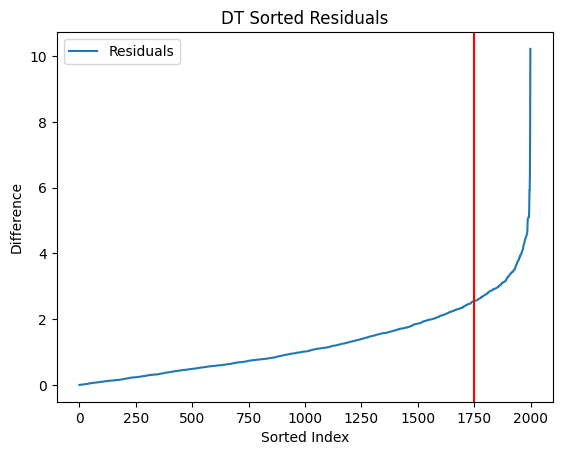

In [242]:
#Sort our residuals and plot them
y_test_list = y_test.values.tolist()
y_pred_list = y_pred.tolist()

diff_list = []
for i in range(len(y_test_list)):
    diff_list.append(abs(y_test_list[i][0] - y_pred_list[i]))

diff_list.sort()

plt.plot(diff_list, label='Residuals')
plt.axvline(x = 1750, color = 'r', linestyle = '-')
plt.title('DT Sorted Residuals')
plt.legend()
plt.xlabel('Sorted Index')
plt.ylabel('Difference')
plt.show()

In [243]:
#Set up and train our HBGBDT model
HBGBDT_reg = HistGradientBoostingRegressor(random_state=0)
HBGBDT_reg.fit(X_train, y_train.values.ravel())

# Generate predictions on test data and evaluate performance metrics
y_pred = HBGBDT_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Test sample MAE: ", mae)
print("Test sample MSE: ", mse)

# Code adapted from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html

Test sample MAE:  0.4597543475100038
Test sample MSE:  0.3743045899249269


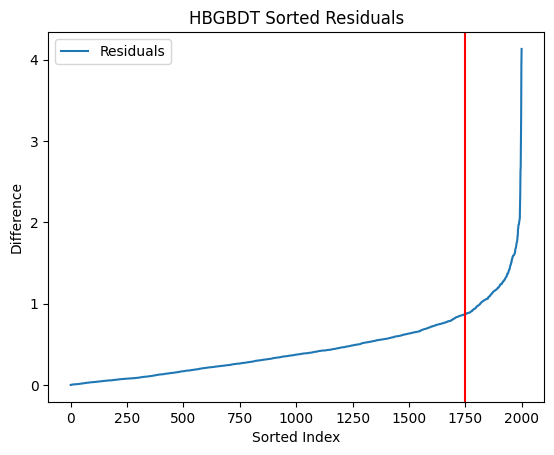

In [244]:
#Sort our residuals and plot them
y_test_list = y_test.values.tolist()
y_pred_list = y_pred.tolist()

diff_list = []
for i in range(len(y_test_list)):
    diff_list.append(abs(y_test_list[i][0] - y_pred_list[i]))

diff_list.sort()

plt.plot(diff_list, label='Residuals')
plt.axvline(x = 1750, color = 'r', linestyle = '-')
plt.title('HBGBDT Sorted Residuals')
plt.legend()
plt.xlabel('Sorted Index')
plt.ylabel('Difference')
plt.show()

### E1: ACCURACY AND MSE

Now that we have run both of our models, we can compare their performance on our testing dataset. Unlike a classifier model, a regressor can not yield an accuracy score that represents the percentage of times the model correctly predicted the value of the target variable. This is because our target variable is continuous, meaning that virtually every predicted value will deviate from the observed value at least a small amount. 

Instead, regressors are better evaluated using calculations derived from the size of their prediction errors on test data– that is to say, data on which the model was not trained. This is typically done by calculating the model’s MSE, which we can achieve by summing the squared residuals of the model and dividing the sum by the number of total predictions on a data set. Unlike models that train to minimize mean absolute error (MAE), using MSE means that the model is more sensitive to larger errors than smaller ones, as a squared error increases exponentially (by definition) as its absolute error increases linearly. 

We can also better understand the practical performance of a decision tree regressor by inspecting the results of their actual predictions on the test data, essentially visualizing the model’s raw, ordered residuals.

Our tuned decision tree regressor demonstrated an MSE of 2.7689  when run on the test dataset, with an MAE of 1.2867. When the absolute values of its test residuals (absolute errors) are ordered and graphed, we can see that the maximum absolute error was around 10 months, and by generating a vertical line at the 1750 index, we can see that ⅞ of the absolute errors ranged from nearly zero to roughly 2.5 months.

Our untuned HBGBDT demonstrated a test MSE of .3743, with an MAE of less than .4598. Examining the ordered residuals of the model, we see a maximum absolute residual of around 4, with ⅞ of the predictions having an absolute error at or below roughly ¾ of a month. These results show a substantial increase in model performance over a tuned decision tree regressor, especially since our HBGBDT has not been tuned with optimal hyperparameters generated via grid search.

### E2: RESULTS AND IMPLICATIONS

Of the two models evaluated, we can see that an untuned histogram-based gradient boosting decision tree model drastically outperformed a tuned decision tree. While our untuned decision tree (MSE = 2.7689) did not meet our described goal of a test MSE below 1, the HBGBDT cleanly met our goal with an MSE of .3743. Based on that, we not only have an answer to our research question, but we have a model with a demonstrated accuracy high enough to imply that statistically significant relationships certainly exist between Tenure and other variables in our dataset. This implication confirms that we can move forward with generating further recommendations to explore which variables most contribute to customer Tenure based on the confirmation that this analysis has afforded us.

### E3: LIMITATION

One of the largest limitations of this analysis is that it does not explicitly show us how different features actually contribute to customer tenure. A decision tree based model is non-parametric, and robust enough to recognize different non-linear relationships between features, but even if we were to algorithmically extract the most important features in the decision tree model (an attribute included in sklearn’s DecisionTreeRegressor class object, but not in its HistGradientBoostingRegressor class object), these results would not show us the actual nature of any of these relationships. In effect, the results of our analysis serve only to reveal whether or not deeper exploratory data analysis of customer tenure is necessary.

### E4: COURSE OF ACTION

Based on the results of the analysis and the limitations identified through the exploration of this feature, I would strongly recommend further analysis of customer tenure, with a primary objective of revealing the specific features and relationships that correlate to tenure most significantly. I would first recommend bivariate analysis of every appropriate variable in the dataset against customer tenure, which could be further expanded to a multiple linear regression model. Based on the performance of that model (or lack thereof), I might then recommend broadening the types of relationships being evaluated by including polynomial regression techniques and nonlinear transformations on dependent variables in subsequent analyses. The ultimate goal of future analysis would be to establish which features or groups of features translate to longer customer tenure, and by extension through tenure’s demonstrated mitigative logistic relationship with churn, fewer customers discontinuing service.

### F: PANOPTO DEMONSTRATION

A brief demonstration video of this code, including a description of the software environment used to develop it, has been recorded via Panopto and submitted for evaluation in conjunction with this Jupyter notebook per instructions in the WGU submission portal.

The software used in the production of this code is as follows:

Operating System: Windows 11 Home<br>
Code Editor and Integrated Development Environment: Microsoft Visual Studio Code<br>
Browser used for research and submission: Google Chrome<br>
Spreadsheet editor: Microsoft Excel

### G: SOURCES OF THIRD PARTY CODE

SciKitLearn-developers. (2007-2023). Sklearn.metrics.mean_squared_error. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html.

SciKitLearn-developers. (2007-2023). Sklearn.model_selection.GridSearchCV. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

SciKitLearn-developers. (2007-2023). Sklearn.tree.DecisionTreeRegressor. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html.

SciKitLearn-developers. (2007-2023). Sklearn.ensemble.HistGradientBoostingClassifier. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html

### H: SOURCES

Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical statistics for data scientists : 50+ essential concepts using r and python. O'Reilly Media, Incorporated.

Kovan, I. (2021). An Overview of Boosting Methods: CatBoost, XGBoost, AdaBoost, LightBoost, Histogram-Based Gradient Boost. https://towardsdatascience.com/an-overview-of-boosting-methods-catboost-xgboost-adaboost-lightboost-histogram-based-gradient-407447633ac1

Larose, C. D., & Larose, D. T. (2019). Data science using Python and R. ISBN-13: 978-1-119-52684-1.

